# Name: Vinusha Sandadi


## Top 25 Twitter Users by Followers


## Question:
### Retrieving users with highest number of followers, also comparing whether the top users have more number of tweets 

##### I used socialblade website to scrap the data and retrieved top 25 users and also visualized te data

In [1]:
# Importing libraries
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
# website used for web scraping
url = "https://socialblade.com/twitter/"

In [3]:
# sending html requests 
html = requests.get(url)
results = html.text

In [4]:
print(results[:400])

<!DOCTYPE html>
<head>
        <title>Track Twitter analytics, future predictions, & Twitter usage graphs - Social Blade</title>
        <meta name="description" content="View the daily Twitter analytics, track progress charts, view future predictions, Twitter top charts, Twitter influencers, & more!">
        <meta name="keywords" content="Twitter statistics, Twitter analytics, daily statisti


## Pickling data

In [5]:

import pickle
# pickling data
with open('data.pkl', 'wb') as f:
    pickle.dump(results, f)

# loading data from a pickle file
with open('data.pkl', 'rb') as f:
    new_results = pickle.load(f)
    print(type(new_results))

<class 'str'>


In [6]:
# Extracting the results from and storing it in soup 
soup = BeautifulSoup(new_results)
# printing the results in soup
print(soup)

<!DOCTYPE html>
<html><head>
<title>Track Twitter analytics, future predictions, &amp; Twitter usage graphs - Social Blade</title>
<meta content="View the daily Twitter analytics, track progress charts, view future predictions, Twitter top charts, Twitter influencers, &amp; more!" name="description"/>
<meta content="Twitter statistics, Twitter analytics, daily statistics, daily graphs, Twitter users, top Twitter users, top charts" name="keywords"/>
<meta charset="utf-8"/>
<meta content="website" property="og:type"/>
<meta content="View the daily Twitter analytics, track progress charts, view future predictions, Twitter top charts, Twitter influencers, &amp; more!" property="og:description"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="socialblade" name="twitter:site"/>
<meta content="View the daily Twitter analytics, track progress charts, view future predictions, Twitter top charts, Twitter influencers, &amp; more!" name="twitter:description"/>
<meta conte

In [7]:
    body = soup.findAll("div",{"class": "table-body"})
    print(body)

[<div class="table-body">
<div class="table-cell section-rank">1</div>
<div class="table-cell section-grade"><span style="color:#00bee7;">A++</span></div>
<div class="table-cell section-med"><a href="/twitter/user/katyperry">katyperry</a></div>
<div class="table-cell section-lg">KATY PERRY</div>
<div class="table-cell section-sm">10,002</div>
<div class="table-cell section-med">107,628,466</div>
<div class="table-cell section-med">220</div>
</div>, <div class="table-body">
<div class="table-cell section-rank">2</div>
<div class="table-cell section-grade"><span style="color:#00bee7;">A++</span></div>
<div class="table-cell section-med"><a href="/twitter/user/barackobama">BarackObama</a></div>
<div class="table-cell section-lg">Barack Obama</div>
<div class="table-cell section-sm">15,645</div>
<div class="table-cell section-med">106,838,347</div>
<div class="table-cell section-med">613,544</div>
</div>, <div class="table-body">
<div class="table-cell section-rank">3</div>
<div class="tab

In [8]:
#loading html data in to a table by choosing rank, grade, user_name,display_name,tweets,followers,following to be displayed
def table(row):
    data = [i.text for i in row if i !=u'\n']
    return dict(rank = int(data[0]), grade = str(data[1]), user_name = str(data[2]), display_name = str(data[3].replace(",","")), tweets = int(data[4].replace(",","")), followers = int(data[5].replace(",","")),following=int(data[6].replace(",","")))


In [9]:
for i in range(25):
    print(table(body[i]))

{'rank': 1, 'grade': 'A++', 'user_name': 'katyperry', 'display_name': 'KATY PERRY', 'tweets': 10002, 'followers': 107628466, 'following': 220}
{'rank': 2, 'grade': 'A++', 'user_name': 'BarackObama', 'display_name': 'Barack Obama', 'tweets': 15645, 'followers': 106838347, 'following': 613544}
{'rank': 3, 'grade': 'A++', 'user_name': 'justinbieber', 'display_name': 'Justin Bieber', 'tweets': 30491, 'followers': 105898645, 'following': 298264}
{'rank': 4, 'grade': 'A++', 'user_name': 'rihanna', 'display_name': 'Rihanna', 'tweets': 10320, 'followers': 91833267, 'following': 1081}
{'rank': 5, 'grade': 'A++', 'user_name': 'taylorswift13', 'display_name': 'Taylor Swift', 'tweets': 217, 'followers': 83703185, 'following': 0}
{'rank': 6, 'grade': 'A++', 'user_name': 'ladygaga', 'display_name': 'Lady Gaga', 'tweets': 8964, 'followers': 78812787, 'following': 124883}
{'rank': 7, 'grade': 'A++', 'user_name': 'Cristiano', 'display_name': 'Cristiano Ronaldo', 'tweets': 3411, 'followers': 78527212, '

In [10]:
# performing iterations to obtain all the results
data = []
for tr in body:
    datum = table(tr)
    for a in tr.find_all('a', href= True):
        datum['url'] = a['href']
    data.append(datum)

##  Importing data in to pandas

In [11]:
# storing the result in pandas data frame
df = pd.DataFrame(data)
df

,display_name,followers,following,grade,rank,tweets,url,user_name
0,KATY PERRY,107628466,220,A++,1,10002,/twitter/user/katyperry,katyperry
1,Barack Obama,106838347,613544,A++,2,15645,/twitter/user/barackobama,BarackObama
2,Justin Bieber,105898645,298264,A++,3,30491,/twitter/user/justinbieber,justinbieber
3,Rihanna,91833267,1081,A++,4,10320,/twitter/user/rihanna,rihanna
4,Taylor Swift,83703185,0,A++,5,217,/twitter/user/taylorswift13,taylorswift13
5,Lady Gaga,78812787,124883,A++,6,8964,/twitter/user/ladygaga,ladygaga
6,Cristiano Ronaldo,78527212,51,A++,7,3411,/twitter/user/cristiano,Cristiano
7,Ellen DeGeneres,77962296,31238,A++,8,19799,/twitter/user/theellenshow,TheEllenShow
8,YouTube,71592617,1036,A++,9,23494,/twitter/user/youtube,YouTube
9,Justin Timberlake,65000525,291,A++,10,4095,/twitter/user/jtimberlake,jtimberlake


##  visualizing the results using Matplotlib

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

## Bar Graph to show the top followed users


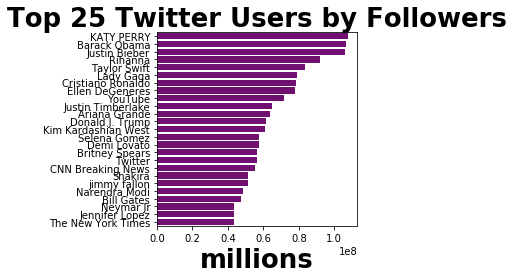

In [13]:
ax = sns.barplot(x="followers", y="display_name", data= df, color='purple')#palette=("RdPu"))
style.use('ggplot')
plt.title('Top 25 Twitter Users by Followers', fontweight='bold',fontsize =26)
plt.xlabel("millions", fontweight='bold',fontsize =26)
plt.ylabel(" ")
plt.tight_layout()
plt.savefig('followers.png', Transparent = True)


## Users with respective tweets


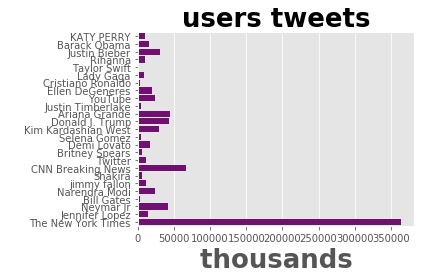

In [14]:
ax = sns.barplot(x="tweets", y="display_name", data= df, color='purple')#palette=("RdPu"))
style.use('ggplot')
plt.title('users tweets', fontweight='bold',fontsize=26)
plt.xlabel(" thousands ", fontweight='bold',fontsize=26)
plt.ylabel(" ")
plt.tight_layout()
plt.savefig('tweets.png', Transparent = True)


## Conclusion

### After doing the scrapping using python on twitter we can see the number of followers for top 25 users and their total number of tweets on twiter.